<a href="https://colab.research.google.com/github/icebearian/Python-machinelearning/blob/main/Lec1_4_IntroToPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Xử lý dữ liệu với Pandas**

In [1]:
import pandas as pd

**Tạo Data Frame**
- Khai báo dữ liệu theo cột

In [2]:
df = pd.DataFrame({
    "X": [13,30,'A'],
    "Y": [15,32,'B'],
    "Z": [10,29,"O"],
    "T": [12,28,"AB"]},
    index = [1,2,3])
df

,X,Y,Z,T
1,13,15,10,12
2,30,32,29,28
3,A,B,O,AB


- Khai báo dữ liệu theo dòng

In [3]:
df= pd.DataFrame(
    [
     [13,15,10,12],
     [30,32,29,28],
     ['A','B','O','AB']
    ],
    index = [1,2,3]
)
df

,0,1,2,3
1,13,15,10,12
2,30,32,29,28
3,A,B,O,AB


- Load từ file csv

In [5]:
analyst = pd.read_csv('Book1.csv',encoding="utf-8")
analyst

,Lop,Khoa,Diem Dau Vao,Trung Tuyen,Si so,HK1,HK2,HK3,HK4,HK5
0,KTPM2018,CNPM,23.20,97.0,90,41,39,25,29,37
1,PMCL2018,CNPM,21.50,93.0,89,30,29,28,24,28
2,CTTT2018,HTTT,17.00,51.0,47,0,5,3,7,6
3,HTCL2018,HTTT,19.00,70.0,73,16,13,3,15,6
4,HTTT2018,HTTT,21.10,57.0,66,16,17,14,34,17
5,TM?T2018,HTTT,21.20,78.0,72,19,10,15,10,28
6,KHCL2018,KHMT,20.25,114.0,116,39,13,18,30,31
7,KHMT2018,KHMT,22.40,95.0,72,30,18,11,27,20
8,KHTN2018,KHMT,22.50,NaN,26,21,12,12,23,22
9,KTMT2018,KTMT,21.70,74.0,53,17,11,13,18,13


**Gom nhóm dữ liệu với pivot**

In [13]:
analyst.pivot(index="Lop", columns="Khoa",values="Diem Dau Vao")
analyst.head(5)

,Lop,Khoa,Diem Dau Vao,Trung Tuyen,Si so,HK1,HK2,HK3,HK4,HK5
0,KTPM2018,CNPM,23.2,97.0,90,41,39,25,29,37
1,PMCL2018,CNPM,21.5,93.0,89,30,29,28,24,28
2,CTTT2018,HTTT,17.0,51.0,47,0,5,3,7,6
3,HTCL2018,HTTT,19.0,70.0,73,16,13,3,15,6
4,HTTT2018,HTTT,21.1,57.0,66,16,17,14,34,17


**Gom nhóm dữ liệu với pivot_table**

In [10]:
import numpy as np
analyst.pivot_table(index="Khoa", values="Diem Dau Vao",aggfunc=np.mean)

,Diem Dau Vao
Khoa,
CNPM,22.350000
HTTT,19.575000
KHMT,21.716667
KTMT,20.050000
KTTT,20.700000
MMTTT,20.780000


**Nối dữ liệu theo chiều dọc với concat (axis = 0)**

In [16]:
df1 = pd.DataFrame({
    "Nganh": ["KTPM","KHMT","CNTT","ATTT"],
    "Diem chuan": [27,26,25.5,22],
    "Trung tuyen": [60,44,35,55]},
    index = [1,2,3,4])
df2 = pd.DataFrame({
    "Nganh": ["KTMT","KHDL","MMTT","TMDT"],
    "Diem chuan": [25,24,23,21],
    "Trung tuyen": [54,33,54,76],
    "HDT": ["CLC","DT","CLC","DT"]},
    index = [1,2,3,4])
df_new = pd.concat([df1,df2])
df_new


,Nganh,Diem chuan,Trung tuyen,HDT
1,KTPM,27.0,60,NaN
2,KHMT,26.0,44,NaN
3,CNTT,25.5,35,NaN
4,ATTT,22.0,55,NaN
1,KTMT,25.0,54,CLC
2,KHDL,24.0,33,DT
3,MMTT,23.0,54,CLC
4,TMDT,21.0,76,DT


**Điền giá trị khuyết với fillna**

In [21]:
df_new.fillna("DT")

,Nganh,Diem chuan,Trung tuyen,HDT
1,KTPM,27.0,60,DT
2,KHMT,26.0,44,DT
3,CNTT,25.5,35,DT
4,ATTT,22.0,55,DT
1,KTMT,25.0,54,CLC
2,KHDL,24.0,33,DT
3,MMTT,23.0,54,CLC
4,TMDT,21.0,76,DT


**Nối dữ liệu theo chiều ngang với concat (axis=1)**

In [22]:
df1 = pd.DataFrame({
    "Nganh": ["KTPM","KHMT","CNTT","ATTT"],
    "Diem chuan": [27,26,25.5,22],
    "Trung tuyen": [60,44,35,55]},
    index = [1,2,3,4])
df2 = pd.DataFrame({
    "HDT": ["CLC","DT","CLC",],
    "Hoc phi": [15000,6000,15000]},
    index = [1,2,3])
df_new = pd.concat([df1,df2],axis =1)
df_new


,Nganh,Diem chuan,Trung tuyen,HDT,Hoc phi
1,KTPM,27.0,60,CLC,15000.0
2,KHMT,26.0,44,DT,6000.0
3,CNTT,25.5,35,CLC,15000.0
4,ATTT,22.0,55,NaN,NaN


**Lấy tập con theo dòng**

In [26]:
sub_df = df_new[df_new.HDT == "CLC"]
sub_df

,Nganh,Diem chuan,Trung tuyen,HDT,Hoc phi
1,KTPM,27.0,60,CLC,15000.0
3,CNTT,25.5,35,CLC,15000.0


In [30]:
sub_df = df_new[df_new.Nganh.isin(["KTPM","KHMT"])]
sub_df

,Nganh,Diem chuan,Trung tuyen,HDT,Hoc phi
1,KTPM,27.0,60,CLC,15000.0
2,KHMT,26.0,44,DT,6000.0


**Lấy tập con theo cột**

In [32]:
col_Nganh = df_new.Nganh
col_Nganh


1    KTPM
2    KHMT
3    CNTT
4    ATTT
Name: Nganh, dtype: object

**Tạo cột mới**

In [36]:
analyst['10_percent'] = analyst.HK1*0.1
analyst.head(5)

,Lop,Khoa,Diem Dau Vao,Trung Tuyen,Si so,HK1,HK2,HK3,HK4,HK5,10_percent
0,KTPM2018,CNPM,23.2,97.0,90,41,39,25,29,37,4.1
1,PMCL2018,CNPM,21.5,93.0,89,30,29,28,24,28,3.0
2,CTTT2018,HTTT,17.0,51.0,47,0,5,3,7,6,0.0
3,HTCL2018,HTTT,19.0,70.0,73,16,13,3,15,6,1.6
4,HTTT2018,HTTT,21.1,57.0,66,16,17,14,34,17,1.6


**Vẽ biểu đồ với plot**

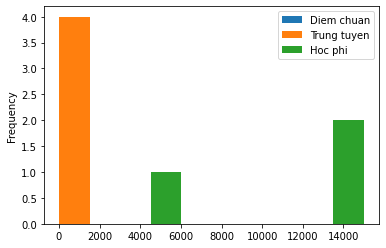

In [41]:
df_new.plot.hist()

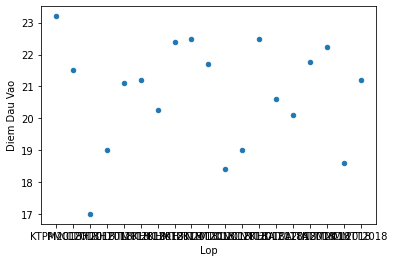

In [40]:
analyst.plot.scatter(x="Lop",y="Diem Dau Vao")